## 4. Model Architecture: GRU

**GRU (Gated Recurrent Unit)**:
- Simplified version of LSTM with fewer parameters
- Uses only 2 gates (reset and update) instead of 3
- Faster to train, often performs similarly to LSTM
- Good choice when computational efficiency matters

In [9]:
# Test GRU model
gru_model = build_gru_model(
    sequence_length=sequence_length,
    n_features=n_features,
    gru_units=128,
    gru_layers=2
)

print("GRU Model Architecture:")
print("="*80)
gru_model.summary()

print(f"\nTotal parameters: {gru_model.count_params():,}")
print(f"\nParameter comparison: GRU has {lstm_model.count_params() - gru_model.count_params():,} fewer parameters than LSTM")

GRU Model Architecture:


Model: "GRU_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 60, 128)        │        72,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_gru_1 (Dropout)         │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_gru_2 (Dropout)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense (Dropout)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,585 (701.50 KB)

 Trainable params: 179,585 (701.50 KB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 179,585

Parameter comparison: GRU has 56,064 fewer parameters than LSTM


## 5. Model Architecture: 1D CNN

**1D Convolutional Neural Network**:
- Applies convolutional filters across time dimension
- Extracts local patterns (e.g., short-term trends)
- Faster to train than RNNs
- Good for capturing patterns at multiple time scales

In [11]:
# Test CNN model
cnn_model = build_cnn_model(
    sequence_length=sequence_length,
    n_features=n_features,
    filters=[64, 128, 256]
)

print("CNN Model Architecture:")
print("="*80)
cnn_model.summary()

print(f"\nTotal parameters: {cnn_model.count_params():,}")

CNN Model Architecture:


Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 60, 64)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling1D)       │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_1 (Dropout)        │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 30, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_2 (MaxPooling1D)       │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_2 (Dropout)        │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 15, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 15, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_3 (MaxPooling1D)       │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_3 (Dropout)        │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool                 │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense (Dropout)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,281 (661.25 KB)

 Trainable params: 168,385 (657.75 KB)

 Non-trainable params: 896 (3.50 KB)


Total parameters: 169,281


## 6. Model Architecture: Transformer

**Transformer with Self-Attention**:
- Uses multi-head attention mechanism
- Can capture long-range dependencies more efficiently than LSTM
- No recurrence = can be parallelized
- Requires positional encoding for temporal information

[OK] Transformer model builder defined


In [13]:
# Test Transformer model
transformer_model = build_transformer_model(
    sequence_length=sequence_length,
    n_features=n_features,
    num_transformer_blocks=2,
    num_heads=4
)

print("Transformer Model Architecture:")
print("="*80)
transformer_model.summary()

print(f"\nTotal parameters: {transformer_model.count_params():,}")

Transformer Model Architecture:


Model: "Transformer_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 60, 58)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 58)    │    240,698 │ input_layer_3[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 60, 58)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 60, 58)    │          0 │ input_layer_3[0]… │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 60, 58)    │        116 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 60, 256)   │     15,104 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 60, 256)   │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 60, 58)    │     14,906 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 60, 58)    │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 60, 58)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 58)    │        116 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 58)    │    240,698 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 60, 58)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 60, 58)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 58)    │        116 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 60, 256)   │     15,104 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 60, 256)   │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 60, 58)    │     14,906 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 60, 58)    │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 60, 58)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_7[0][0] 

 Total params: 549,561 (2.10 MB)

 Trainable params: 549,561 (2.10 MB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 549,561


## 7. Model Architecture: Hybrid CNN-LSTM

**Hybrid CNN-LSTM**:
- Combines strengths of both architectures
- CNN extracts local patterns and reduces dimensionality
- LSTM captures temporal dependencies in CNN features
- Often performs well on time series data

[OK] Hybrid CNN-LSTM model builder defined


In [15]:
# Test Hybrid model
hybrid_model = build_hybrid_cnn_lstm_model(
    sequence_length=sequence_length,
    n_features=n_features,
    conv_filters=[64, 128],
    lstm_units=128,
    lstm_layers=2
)

print("Hybrid CNN-LSTM Model Architecture:")
print("="*80)
hybrid_model.summary()

print(f"\nTotal parameters: {hybrid_model.count_params():,}")

Hybrid CNN-LSTM Model Architecture:


Model: "Hybrid_CNN_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 60, 64)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_1 (Dropout)        │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 60, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 60, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_2 (Dropout)        │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_lstm_1 (Dropout)        │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_lstm_2 (Dropout)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense (Dropout)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,161 (1.18 MB)

 Trainable params: 307,777 (1.17 MB)

 Non-trainable params: 384 (1.50 KB)


Total parameters: 308,161


## 8. Model Comparison: Parameter Counts

MODEL PARAMETER COMPARISON
          Model  Parameters
            CNN      169281
            GRU      179585
           LSTM      235649
Hybrid CNN-LSTM      308161
    Transformer      549561


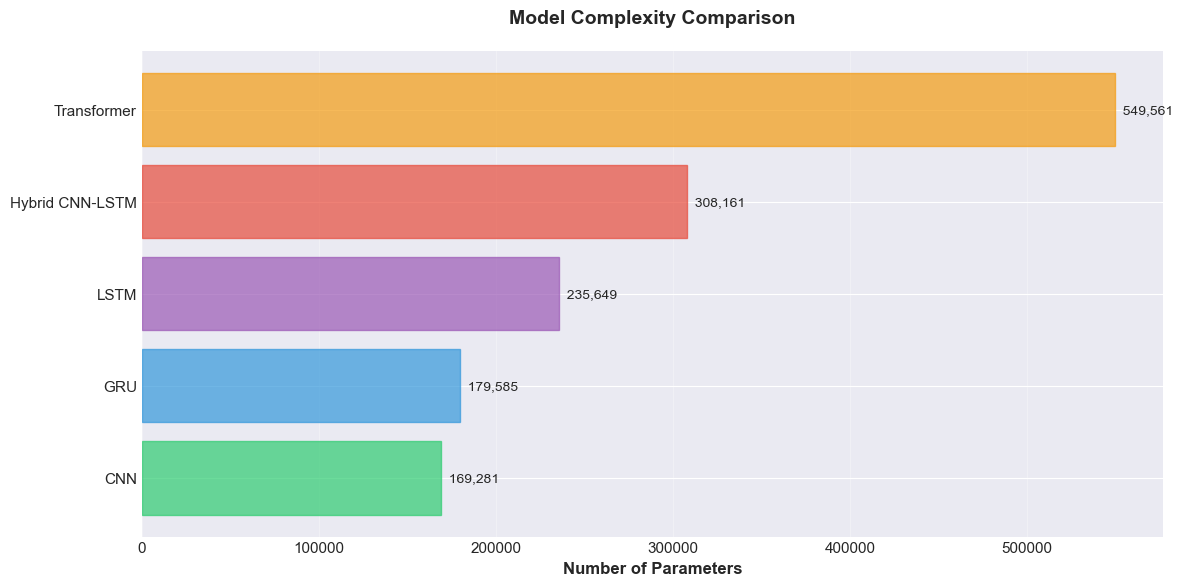


[OK] Parameter comparison visualization saved


In [16]:
# Compare model sizes
model_comparison = pd.DataFrame([
    {'Model': 'LSTM', 'Parameters': lstm_model.count_params()},
    {'Model': 'GRU', 'Parameters': gru_model.count_params()},
    {'Model': 'CNN', 'Parameters': cnn_model.count_params()},
    {'Model': 'Transformer', 'Parameters': transformer_model.count_params()},
    {'Model': 'Hybrid CNN-LSTM', 'Parameters': hybrid_model.count_params()}
])

model_comparison = model_comparison.sort_values('Parameters')

print("="*60)
print("MODEL PARAMETER COMPARISON")
print("="*60)
print(model_comparison.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(model_comparison['Model'], model_comparison['Parameters'], alpha=0.7, edgecolor='black')

# Color bars
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f39c12']
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_xlabel('Number of Parameters', fontsize=12, fontweight='bold')
ax.set_title('Model Complexity Comparison', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (model, params) in enumerate(zip(model_comparison['Model'], model_comparison['Parameters'])):
    ax.text(params, i, f'  {params:,}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig(f'{FIGURES_DIR}model_parameter_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[OK] Parameter comparison visualization saved")